In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

org_heats_dir = "/home/lyuze/workspace/py_track"
interested_file = "obj_dump.txt"
org_heats_file = os.path.join(org_heats_dir, interested_file)

In [2]:
columns = ["timestamp", "addr",
           "diff1", "diff2", "diff3", "diff4", "diff5",
           "diff6", "diff7", "diff8", "diff9", "diff10",
           "diff11", "diff12", "diff13", "diff14", "diff15",
           "diff16", "diff17", "diff18", "diff19", "diff20",
           "sizeof"
           ]
org_df = pd.read_csv(org_heats_file, sep="\t", header=None, names=columns)
print(org_df.dtypes)

timestamp    float64
addr           int64
diff1          int64
diff2          int64
diff3          int64
diff4          int64
diff5          int64
diff6          int64
diff7          int64
diff8          int64
diff9          int64
diff10         int64
diff11         int64
diff12         int64
diff13         int64
diff14         int64
diff15         int64
diff16         int64
diff17         int64
diff18         int64
diff19         int64
diff20         int64
sizeof         int64
dtype: object


In [3]:
# dump upper val
# string_to_delete = '0x7ffff7e70d80'

# filtered_df = org_df[org_df['addr'] != string_to_delete]
# filtered_df['addr'] = filtered_df['addr'].apply(lambda x: int(x, 16))
# new_file = "obj_dump_no_upper.txt"
# new_file_path = os.path.join(org_heats_dir, new_file)
# filtered_df.to_csv(new_file_path, sep='\t', index=False, header=False)
# org_df = filtered_df

# org_df['addr'] = org_df['addr'].apply(lambda x: int(x, 16))

In [3]:
# check the range of obj_dump.txt
condition_no93 = org_df['addr'].astype(str).str.startswith('9')
with_93 = org_df[condition_no93]
org_df = org_df[~condition_no93]
# condition_no34 = org_df['addr'].astype(str).str.startswith('34')
# org_df = org_df[~condition_no34]

In [4]:
# sort by time and addr and dump to file, probably no need at this time
org_df_sorted = org_df.sort_values(by=['timestamp', 'addr'])
sorted_file = "obj_dump_sorted.txt"
sorted_file_path = os.path.join(org_heats_dir, sorted_file)
org_df_sorted.to_csv(sorted_file_path, sep='\t', index=False, header=False)

org_df = org_df_sorted

In [ ]:
# calc 93 all & diff
print(max(with_93['addr']))
print(with_93)

with_93_file = "matmul_93.csv"
with_93_file_path = os.path.join(org_heats_dir, with_93_file)
with_93.to_csv(with_93_file_path, sep='\t', index=False, header=False)

with_93_changed = with_93[(with_93["diff"] != 0)]
with_93_changed_file = "matmul_93_diff.csv"
with_93_changed_file_path = os.path.join(org_heats_dir, with_93_changed_file)
print("93 changed: ", len(with_93_changed))
with_93_changed.to_csv(with_93_changed_file_path,
                       sep='\t', index=False, header=False)

In [ ]:
# plot 93 all & diff
import subprocess
with_93_png = "matmul_93.png"
command = "gnuplot -e \"output_file='{}'; input_file='{}'\" ./plot.gnuplot ".format(
    with_93_png, with_93_file_path)
completed_process = subprocess.run(
    command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

if len(with_93_changed) != 0:
    with_93_png_changed = "matmul_93_diff.png"
    command = "gnuplot -e \"output_file='{}'; input_file='{}'\" ./plot.gnuplot ".format(
        with_93_png_changed, with_93_changed_file_path)
    completed_process = subprocess.run(
        command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

In [5]:
import subprocess
# cur_idx_file_png = "matmul_all.png"
# command = "gnuplot -e \"output_file='{}'; input_file='{}'\" ./plot.gnuplot ".format(
#     cur_idx_file_png, sorted_file_path)
# completed_process = subprocess.run(
#     command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print("all min:", org_df_sorted['addr'].min(),
      "max:", org_df_sorted['addr'].max())

diff1 = (org_df_sorted['diff1'] != 0)
diff2 = (org_df_sorted['diff2'] != 0)
diff3 = (org_df_sorted['diff3'] != 0)
diff4 = (org_df_sorted['diff4'] != 0)
diff5 = (org_df_sorted['diff5'] != 0)

diff6 = (org_df_sorted['diff6'] != 0)
diff7 = (org_df_sorted['diff7'] != 0)
diff8 = (org_df_sorted['diff8'] != 0)
diff9 = (org_df_sorted['diff9'] != 0)
diff10 = (org_df_sorted['diff10'] != 0)

diff11 = (org_df_sorted['diff11'] != 0)
diff12 = (org_df_sorted['diff12'] != 0)
diff13 = (org_df_sorted['diff13'] != 0)
diff14 = (org_df_sorted['diff14'] != 0)
diff15 = (org_df_sorted['diff15'] != 0)

diff16 = (org_df_sorted['diff16'] != 0)
diff17 = (org_df_sorted['diff17'] != 0)
diff18 = (org_df_sorted['diff18'] != 0)
diff19 = (org_df_sorted['diff19'] != 0)
diff20 = (org_df_sorted['diff20'] != 0)


org_df_changed = org_df_sorted[diff2 | diff3 | diff4 | diff5
                               | diff6 | diff7 | diff8 | diff9 | diff10
                               | diff11 | diff12 | diff13 | diff14 | diff15
                               | diff16 | diff17 | diff18 | diff19 | diff20
                               ]  # cannot contain diff1
# org_df_changed = org_df_sorted[(org_df_sorted["diff"] != 0)]
changed_file = "matmul_diff.csv"
changed_file_path = os.path.join(org_heats_dir, changed_file)
org_df_changed.to_csv(changed_file_path, sep='\t', index=False, header=False)
print("changed: ", len(org_df_changed), "min:", org_df_changed['addr'].min(),
      "max:",  org_df_changed['addr'].max())


# cur_idx_file_png = "matmul_diff.png"
# command = "gnuplot -e \"output_file='{}'; input_file='{}'\" ./plot.gnuplot ".format(
#     cur_idx_file_png, cur_file_path)
# completed_process = subprocess.run(
#     command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

all min: 140732688151984 max: 140737349939296
changed:  93306 min: 140732688186992 max: 140737349919616


4281254      44
4123858      44
4037512      44
4626751      44
4599697      44
           ... 
4750084    5448
4750064    5448
4750215    5448
4750320    5448
4750351    5448
Name: sizeof, Length: 4859138, dtype: int64


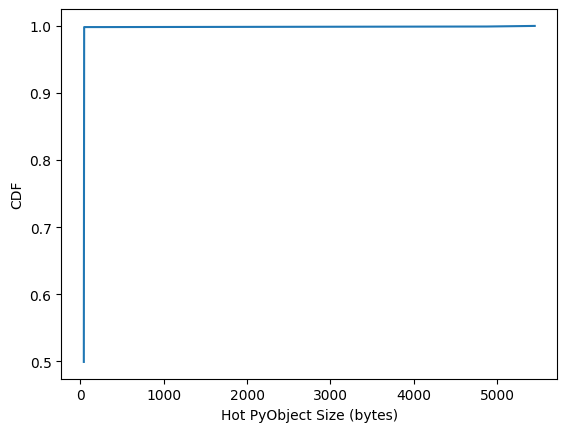

In [20]:
# plot cdf of obj size of org_df_changed
sorted_values = org_df_changed['sizeof'].sort_values()
print(sorted_values)
cdf = sorted_values.rank(method='average', pct=True)
plt.plot(sorted_values, cdf, linestyle='-')
plt.xlabel('Hot PyObject Size (bytes)')
plt.ylabel('CDF')
plt.savefig('matmul_600_changed_size_cdf.png')

In [6]:
def plot_scatter_map(output_file, data_file, x_relative, y_relative, x_min, y_min):
    x_range = [0, x_relative]
    y_range = [0, y_relative]
    gnuplot_cmd = """
        set terminal pngcairo;
        set output '%s';
        set key off;
        set xlabel 'Time (s)';
        set ylabel 'Address (mb)';
        plot '%s' using ($1 - %f):(($2 - %d)/ (1024 * 1024)) with points pointtype 1 pointsize 0.8""" % (output_file,
                                                                                                         data_file, x_min, y_min)
    subprocess.call(['gnuplot', '-e', gnuplot_cmd])

In [ ]:
# for separated slow_idx, no need for now
all_slow_changed_df = []
all_slow_changed_df.clear()
slow_0_cond = (org_df_changed['slow_idx'] == 0)
slow_1_cond = (org_df_changed['slow_idx'] == 1)
slow_2_cond = (org_df_changed['slow_idx'] == 2)
slow_3_cond = (org_df_changed['slow_idx'] == 3)
slow_4_cond = (org_df_changed['slow_idx'] == 4)
slow_5_cond = (org_df_changed['slow_idx'] == 5)
org_df_changed_slow_0 = org_df_changed[slow_0_cond]
org_df_changed_slow_1 = org_df_changed[slow_1_cond]
org_df_changed_slow_2 = org_df_changed[slow_2_cond]
org_df_changed_slow_3 = org_df_changed[slow_3_cond]
org_df_changed_slow_4 = org_df_changed[slow_4_cond]
org_df_changed_slow_5 = org_df_changed[slow_5_cond]

all_slow_changed_df.append(org_df_changed_slow_0)
all_slow_changed_df.append(org_df_changed_slow_1)
all_slow_changed_df.append(org_df_changed_slow_2)
all_slow_changed_df.append(org_df_changed_slow_3)
all_slow_changed_df.append(org_df_changed_slow_4)
all_slow_changed_df.append(org_df_changed_slow_5)

for i in range(6):
    # dump
    changed_file_path = os.path.join(
        org_heats_dir, "matmul_diff_slow_{}.csv".format(i))
    all_slow_changed_df[i].to_csv(
        changed_file_path, sep='\t', index=False, header=False)
    if len(all_slow_changed_df[i]) == 0:
        continue
    print("slow_idx: ", i, "changed: ", len(all_slow_changed_df[i]), "min:", all_slow_changed_df[i]['addr'].min(),
          "max:",  all_slow_changed_df[i]['addr'].max())

    # plot
    x_rela_changed = all_slow_changed_df[i]['timestamp'].max(
    ) - all_slow_changed_df[i]['timestamp'].min()
    y_rela_changed = (all_slow_changed_df[i]['addr'].max() -
                      all_slow_changed_df[i]['addr'].min()) / (1024 * 1024)
    x_min_changed = all_slow_changed_df[i]['timestamp'].min()
    y_min_changed = all_slow_changed_df[i]['addr'].min()
    plot_scatter_map("matmul_changed_slow{}.png".format(i), changed_file_path,
                     x_rela_changed, y_rela_changed, x_min_changed, y_min_changed)
    print("plotted ", i)

In [7]:
# plot all
x_rela_all = org_df_sorted['timestamp'].max(
) - org_df_sorted['timestamp'].min()
y_rela_all = (org_df_sorted['addr'].max() -
              org_df_sorted['addr'].min()) / (1024 * 1024)
x_min_all = org_df_sorted['timestamp'].min()
y_min_all = org_df_sorted['addr'].min()
plot_scatter_map("matmul_all.png", sorted_file_path,
                 x_rela_all, y_rela_all, x_min_all, y_min_all)

In [8]:
# plot only changed
print("addr min: ", org_df_changed['addr'].min())
print("addr max: ", org_df_changed['addr'].max())
x_rela_changed = org_df_changed['timestamp'].max(
) - org_df_changed['timestamp'].min()
y_rela_changed = (org_df_changed['addr'].max() -
                  org_df_changed['addr'].min()) / (1024 * 1024)
x_min_changed = org_df_changed['timestamp'].min()
y_min_changed = org_df_changed['addr'].min()
plot_scatter_map("matmul_changed.png", changed_file_path,
                 x_rela_changed, y_rela_changed, x_min_changed, y_min_changed)

addr min:  140732688186992
addr max:  140737349919616


In [ ]:
# generate insights of objects hotness distribution
summary_whole = org_df_changed.describe()
print(summary_whole)
# Step 5: Distribution Analysis
# General distribution of hotness across all objects
# diff2_summary = df['diff2'].describe()

In [ ]:
# separate fast cycels

import subprocess
grouped_orgdf = org_df.groupby('trace_idx')
print(len(grouped_orgdf))
for trace_idx, cur_group_df in grouped_orgdf:
    print("dumping all idx: ", trace_idx)
    cur_idx_file = "matmul_" + str(trace_idx) + ".csv"
    cur_file_path = os.path.join(org_heats_dir, cur_idx_file)
    print(len(cur_group_df))
    cur_group_df.to_csv(cur_file_path, sep='\t', index=False, header=False)

    print("plotting all idx: ", trace_idx)
    cur_idx_file_png = "matmul_" + str(trace_idx) + ".png"
    command = "gnuplot -e \"output_file='{}'; input_file='{}'\" ./plot.gnuplot ".format(
        cur_idx_file_png, cur_idx_file)
    completed_process = subprocess.run(
        command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    print("dumping changed idx: ", trace_idx)
    cur_group_df_no_zeros = cur_group_df[(cur_group_df["diff"] != 0)]
    cur_idx_file = "matmul_" + str(trace_idx) + "_diff.csv"
    cur_file_path = os.path.join(org_heats_dir, cur_idx_file)
    print(len(cur_group_df_no_zeros))
    cur_group_df_no_zeros.to_csv(
        cur_file_path, sep='\t', index=False, header=False)

    print("plotting changed idx: ", trace_idx)
    cur_idx_file_png = "matmul_" + str(trace_idx) + "_diff.png"
    command = "gnuplot -e \"output_file='{}'; input_file='{}'\" ./plot.gnuplot ".format(
        cur_idx_file_png, cur_idx_file)
    completed_process = subprocess.run(
        command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

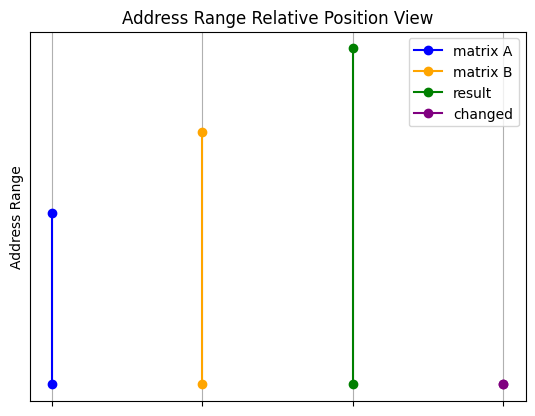

In [1]:
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'purple']
pairs = [
    (2921669495104, 2921713036112),
    (2921669489152, 2921733699264),
    (2921669581184, 2921755127424),
    # (2921668345952, 93824996973504),
    (2921669463136, 2921669509360)
]
plt.figure()
for i, (start, end) in enumerate(pairs):
    label = "Pair"
    # if i == 0:
    #     label = "complete range"
    if i == 0:
        label = "matrix A"
    elif i == 1:
        label = "matrix B"
    elif i == 2:
        label = "result"
    elif i == 3:
        label = "changed"
    # elif i == 4:
    #     label = "changed"
    plt.plot([i, i], [start, end], marker='o',
             label=label, color=colors[i])

# plt.tick_params(axis='y', left=False)
# y_ticks = [140737318486064]
plt.yticks([])
plt.xticks(range(len(pairs)), ["" for i in range(len(pairs))])
plt.ylabel('Address Range')
plt.title('Address Range Relative Position View')
plt.legend()
plt.grid(True)
plt.show()